## Install and import

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import os

## Visualisation

### Visualisation of my collected data

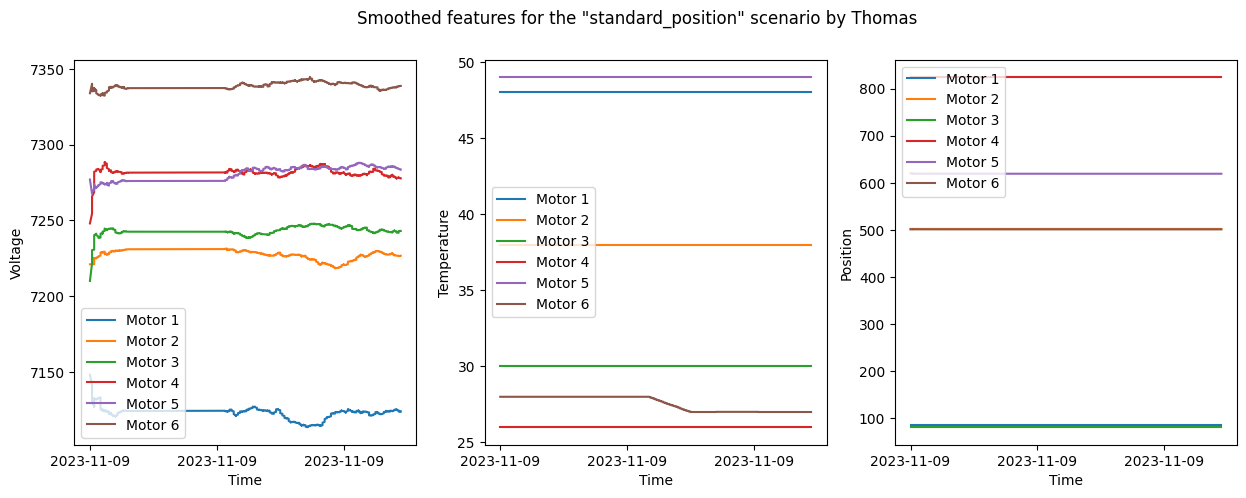

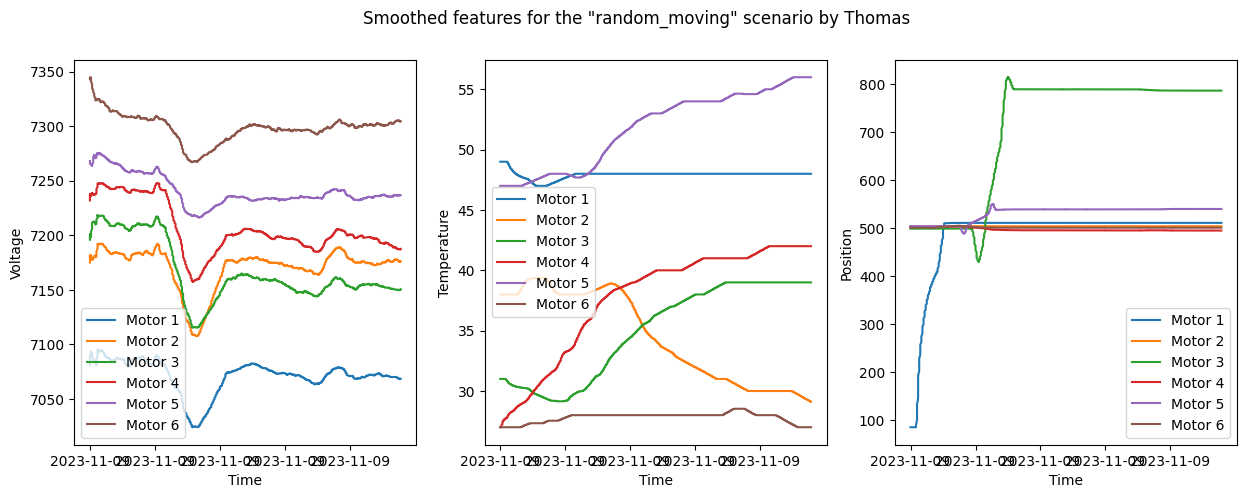

In [26]:
# Read the csv files and extract the data for all 6 motors
chosen_features = ['voltage', 'temperature', 'position']

def plot_smoothed_data(features, folder, scenario, username, window_median, window_mean):
    path = f'{folder}/{scenario}/{username}'
    motor_df = []
    fig, axs = plt.subplots(1, len(features), figsize=(15, 5))
    fig.suptitle(f'Smoothed features for the "{scenario}" scenario by {username}')
    for i, feature in enumerate(features):
        for j in range(1, 7):
            motor_df = pd.read_csv(f'{path}/data_motor_{j}.csv')
            motor_df['time'] = pd.to_datetime(motor_df['time'])
            motor_df[f'{feature}_smooth'] = motor_df[feature].rolling(window=window_median, min_periods=1).median()
            motor_df[f'{feature}_smooth'] = motor_df[f'{feature}_smooth'].rolling(window=window_mean, min_periods=1).mean()
            axs[i].plot(motor_df['time'], motor_df[f'{feature}_smooth'], label=f'Motor {j}')
        axs[i].set_xlabel('Time')
        axs[i].set_ylabel(feature.capitalize())
        axs[i].legend()
        axs[i].set_xticks(pd.date_range(start=motor_df['time'].iloc[0], end=motor_df['time'].iloc[-1], freq='60S'))
    plt.show()

plot_smoothed_data(features = chosen_features, folder = 'my_collected_data', scenario = 'standard_position', username='Thomas', window_median=5, window_mean=100)
plot_smoothed_data(features = chosen_features, folder = 'my_collected_data', scenario = 'random_moving', username = 'Thomas', window_median=5, window_mean=100)

### Visualisation of the common collected data 

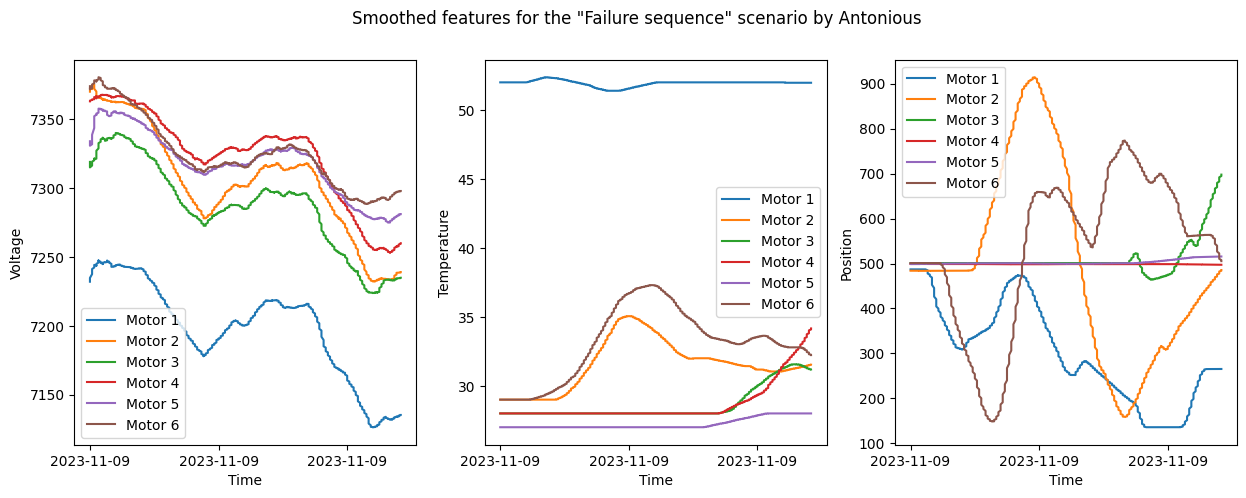

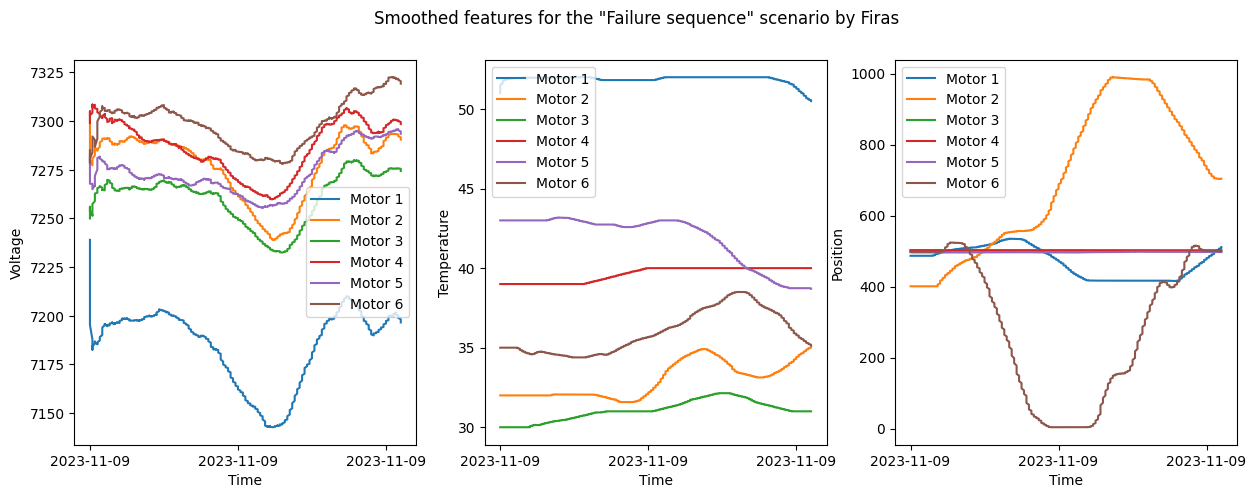

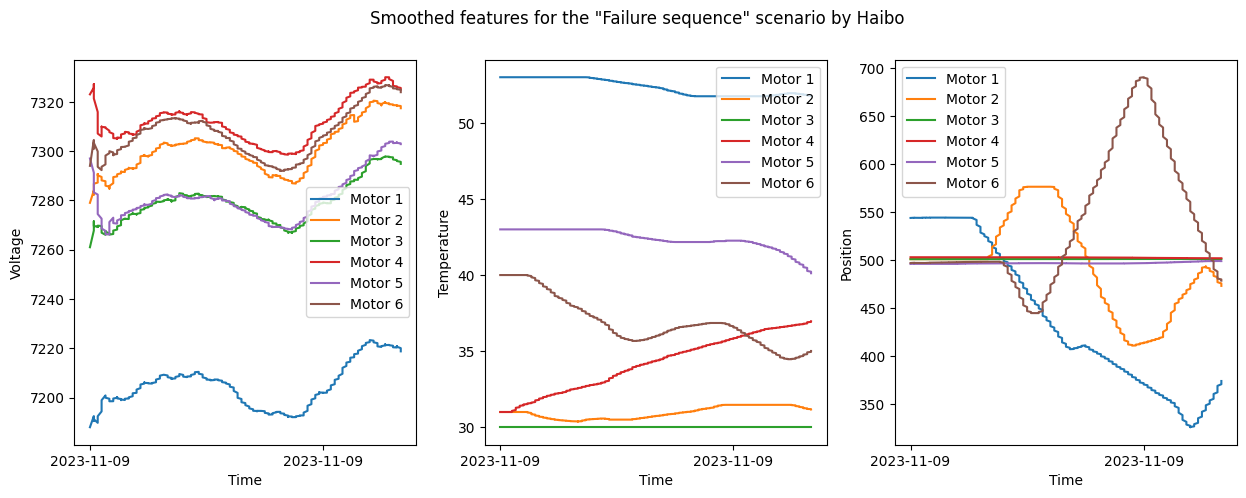

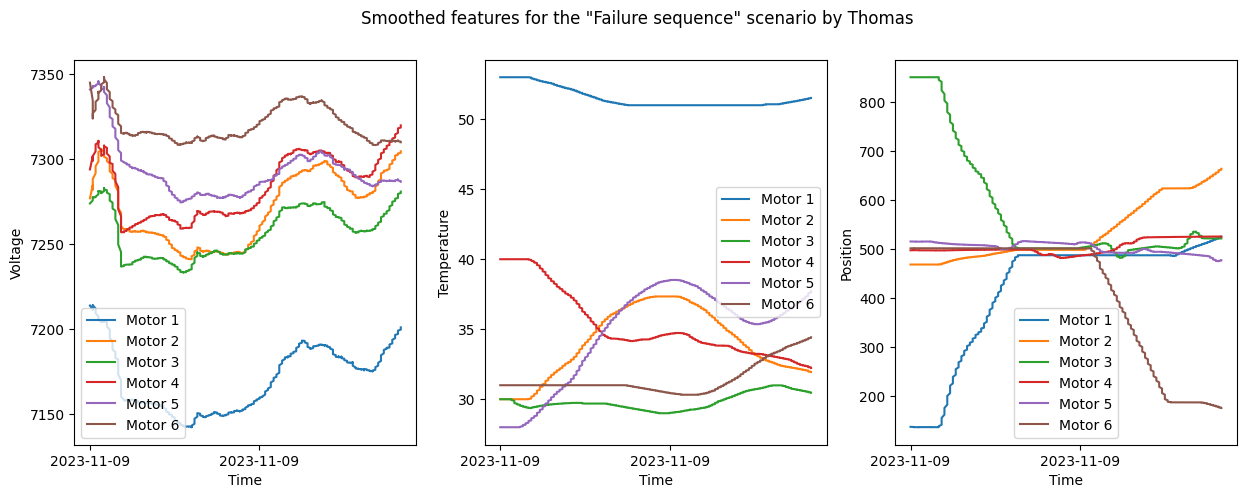

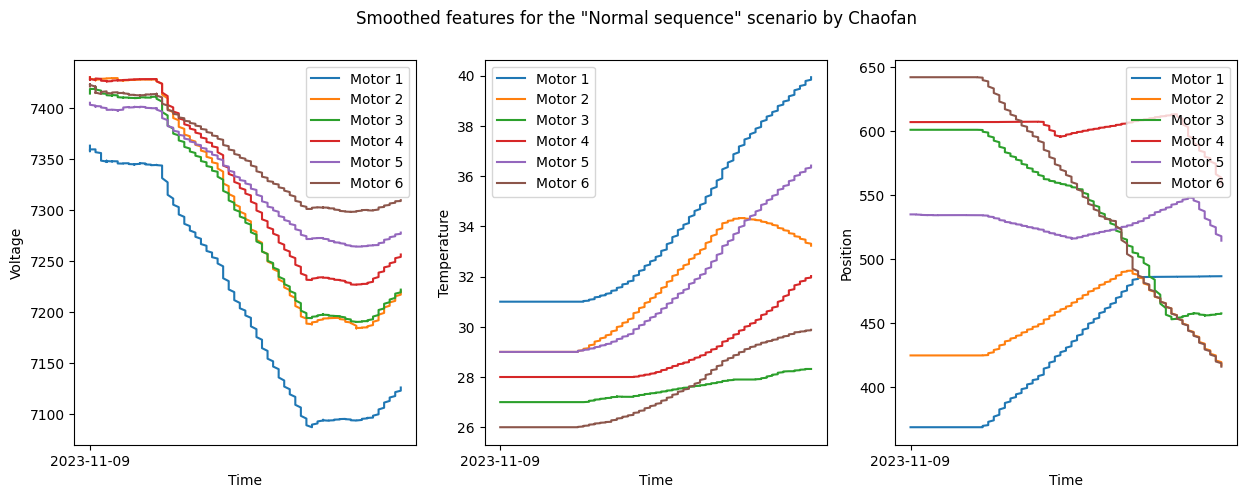

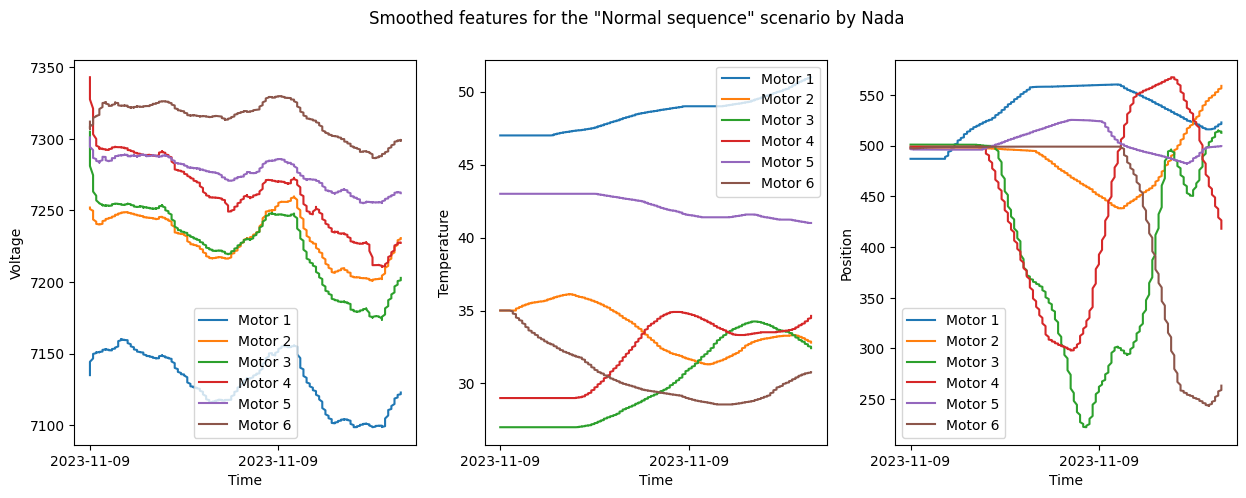

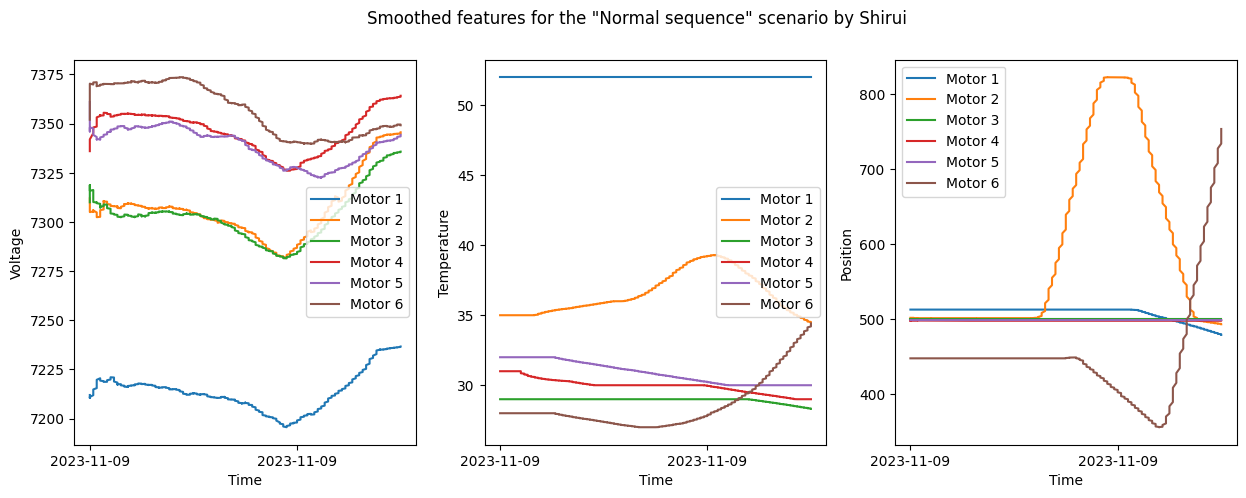

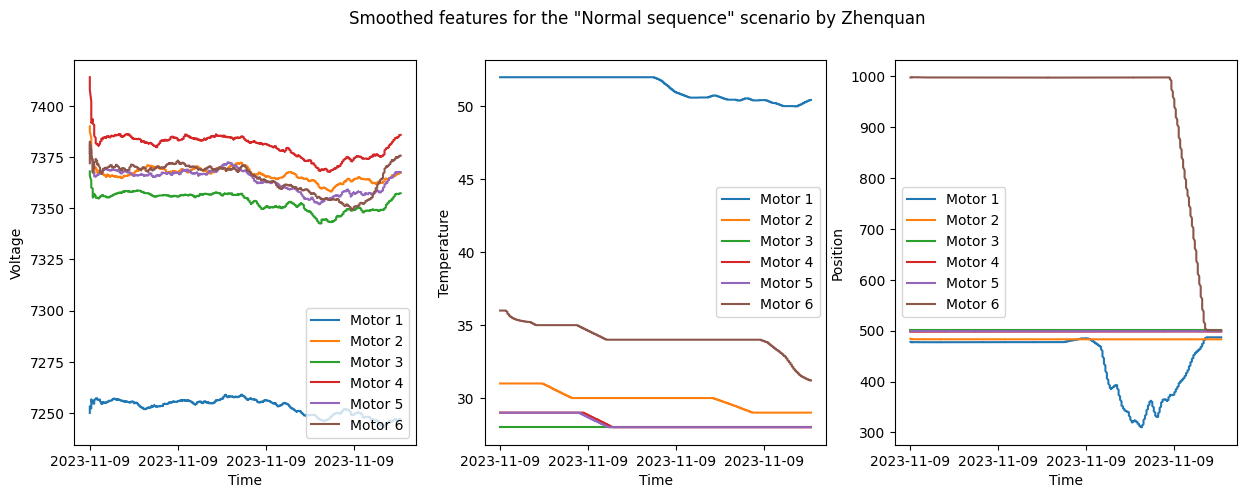

In [23]:
def get_folder_names(folder_path):
    return [name for name in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, name))]

def plot_all_smoothed_data(features, folder, window_median, window_mean):
    for scenario in get_folder_names(folder):
        for username in get_folder_names(f'{folder}/{scenario}'):
            plot_smoothed_data(features, folder, scenario, username, window_median, window_mean)

plot_all_smoothed_data(features = chosen_features, folder = '../Data collection_20231109/', window_median=5, window_mean=100)